# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 624


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | anadyr
Processing Record 2 of Set 1 | udachny
Processing Record 3 of Set 1 | whitehorse
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | bilibino
Processing Record 6 of Set 1 | wailua homesteads
Processing Record 7 of Set 1 | bethel
Processing Record 8 of Set 1 | stanley
Processing Record 9 of Set 1 | dudinka
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | adamstown
Processing Record 12 of Set 1 | port elizabeth
Processing Record 13 of Set 1 | iqaluit
Processing Record 14 of Set 1 | cooper's town
Processing Record 15 of Set 1 | annau
Processing Record 16 of Set 1 | tofol
Processing Record 17 of Set 1 | badagry
Processing Record 18 of Set 1 | galle
Processing Record 19 of Set 1 | invercargill
Processing Record 20 of Set 1 | port-aux-francais
Processing Record 21 of Set 1 | bredasdorp
Processing Record 22 of Set 1 | longyearbyen
Processing Record 23 of 

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          596
Lat           596
Lng           596
Max Temp      596
Humidity      596
Cloudiness    596
Wind Speed    596
Country       596
Date          596
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,anadyr,64.7500,177.4833,-20.56,76,0,8.00,RU,1703904235
1,udachny,66.4167,112.4000,-25.31,83,100,3.35,RU,1703904236
2,whitehorse,60.7161,-135.0538,-10.50,89,100,0.00,CA,1703904153
3,grytviken,-54.2811,-36.5092,-0.45,76,84,2.88,GS,1703904236
4,bilibino,68.0546,166.4372,-41.80,99,55,1.30,RU,1703904236


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [5]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

# Converting the date column into a datetime object
formatted_dates = []
for timestamp in city_data_df['Date']:
    time_struct = time.gmtime(timestamp)
    formatted_date = time.strftime("%Y - %m - %d", time_struct)
    formatted_dates.append(formatted_date)
    
city_data_df['Date'] = formatted_dates
city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,anadyr,64.7500,177.4833,-20.56,76,0,8.00,RU,2023 - 12 - 30
1,udachny,66.4167,112.4000,-25.31,83,100,3.35,RU,2023 - 12 - 30
2,whitehorse,60.7161,-135.0538,-10.50,89,100,0.00,CA,2023 - 12 - 30
3,grytviken,-54.2811,-36.5092,-0.45,76,84,2.88,GS,2023 - 12 - 30
4,bilibino,68.0546,166.4372,-41.80,99,55,1.30,RU,2023 - 12 - 30


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

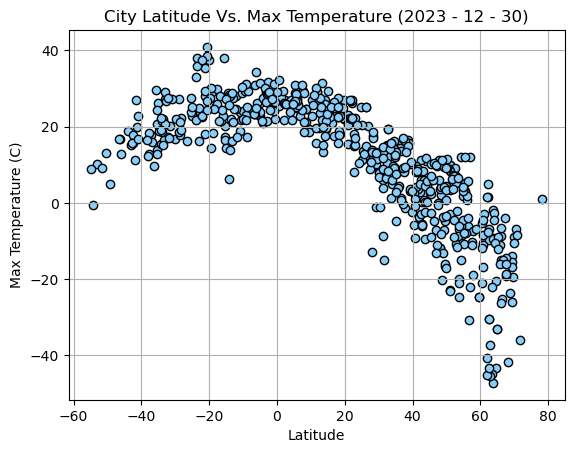

In [6]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], color="lightskyblue", edgecolors='black')

# Incorporate the other graph properties
plt.grid(visible=None, which='major', axis='both')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"City Latitude Vs. Max Temperature ({city_data_df['Date'][0]})")
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

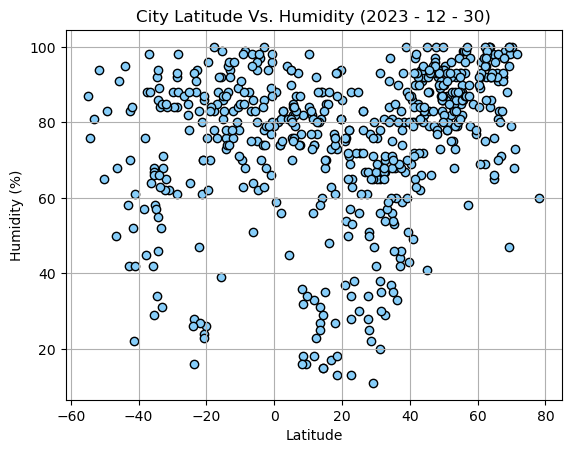

In [7]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], color="lightskyblue", edgecolors='black')

# Incorporate the other graph properties
plt.grid(visible=None, which='major', axis='both')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude Vs. Humidity ({city_data_df['Date'][0]})")

# Save the figure
# plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

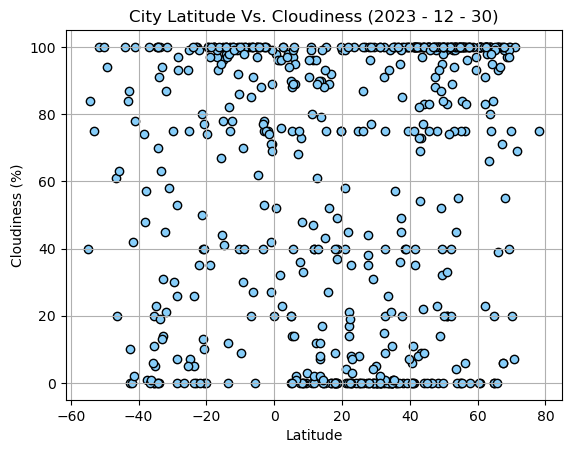

In [8]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], color="lightskyblue", edgecolors='black')

# Incorporate the other graph properties
plt.grid(visible=None, which='major', axis='both')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude Vs. Cloudiness ({city_data_df['Date'][0]})")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

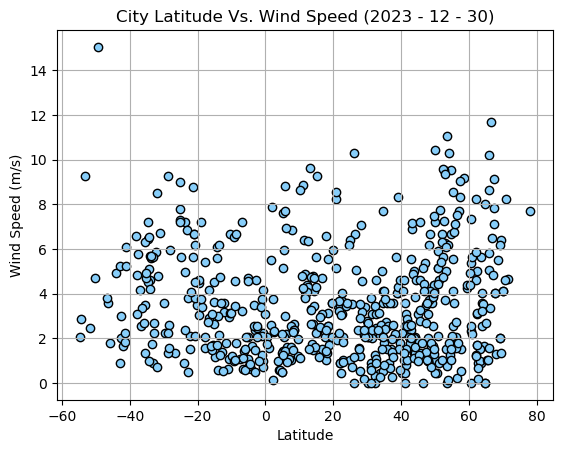

In [9]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], color="lightskyblue", edgecolors='black')

# Incorporate the other graph properties
plt.grid(visible=None, which='major', axis='both')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude Vs. Wind Speed ({city_data_df['Date'][0]})")


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
def linear_regression_plot(x, y):
    # Perform linear regression
    pe_slope, pe_int, pe_r, pe_p, pe_std_err = linregress(x, y)
    regression_line = pe_slope * np.array(x) + pe_int

    print(f'The r-value is: {round(pe_r,2)}')

    # Plotting
    plt.scatter(x, y, label='Data Points')
    plt.plot(x, regression_line, color='red', label='Linear Regression')
    plt.annotate(f'y = {round(pe_slope,2)}x + {round(pe_int,2)}', xy=(min(x)+5,min(y)), 
                 xycoords='data', color='red', size=15)


   

In [11]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,anadyr,64.7500,177.4833,-20.56,76,0,8.00,RU,2023 - 12 - 30
1,udachny,66.4167,112.4000,-25.31,83,100,3.35,RU,2023 - 12 - 30
2,whitehorse,60.7161,-135.0538,-10.50,89,100,0.00,CA,2023 - 12 - 30
4,bilibino,68.0546,166.4372,-41.80,99,55,1.30,RU,2023 - 12 - 30
5,wailua homesteads,22.0669,-159.3780,26.24,78,21,0.89,US,2023 - 12 - 30


In [12]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,grytviken,-54.2811,-36.5092,-0.45,76,84,2.88,GS,2023 - 12 - 30
10,adamstown,-25.0660,-130.1015,22.67,78,99,7.79,PN,2023 - 12 - 30
11,port elizabeth,-33.9180,25.5701,18.51,89,0,4.63,ZA,2023 - 12 - 30
18,invercargill,-46.4000,168.3500,16.68,68,20,3.58,NZ,2023 - 12 - 30
19,port-aux-francais,-49.3500,70.2167,5.05,83,94,15.05,TF,2023 - 12 - 30


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.85


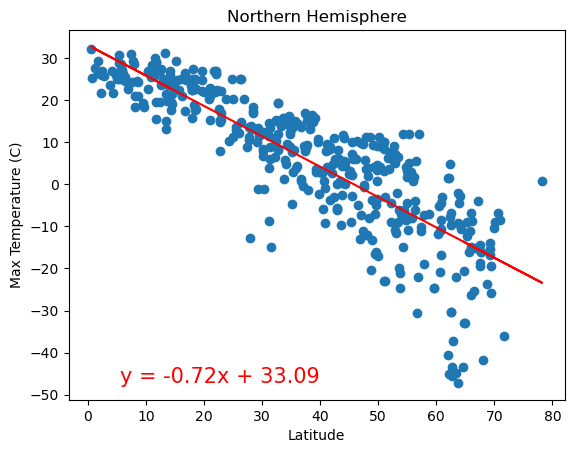

In [15]:
# Linear regression on Northern Hemisphere
linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])

plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('Northern Hemisphere')
plt.show() 


The r-value is: 0.54


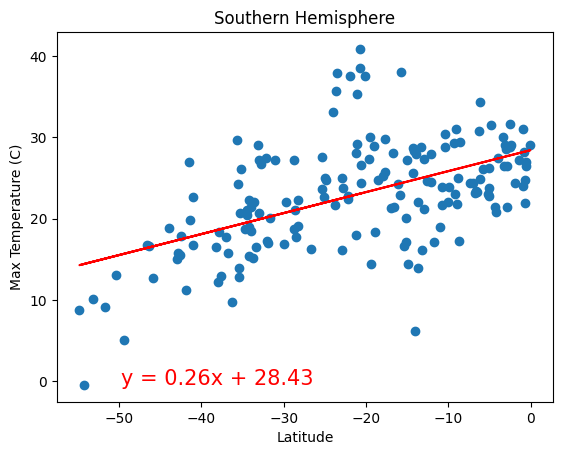

In [19]:
# Linear regression on Southern Hemisphere
linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])

plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('Southern Hemisphere')
plt.show() 

**Discussion about the linear relationship:** YOUR RESPONSE HERE

The relationship between maximum temperature and a city's latitude indicates a distinct pattern in proximity to the equator. As cities draw closer to the equator, temperatures tend to rise, whereas cities farther away experience lower temperatures. This pattern is distinctly evident through a linear regression analysis, revealing a very robust negative correlation in the northern hemisphere. However, the correlation appears moderate and positive in the southern hemisphere. The positive or negative correlation specifically indicates the directional relationship concerning the distance from the equator. It illustrates how temperature changes as cities either move away from or approach the equator. 

In conclusion, in the northern hemisphere, latitude could be a more reliable predictor of a city's temperature based on its proximity to the equator.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.43


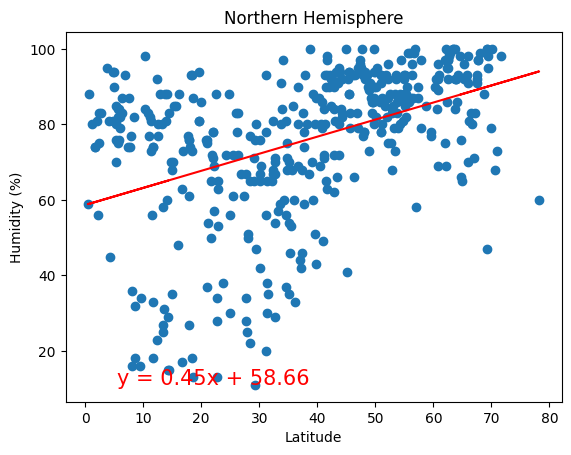

In [20]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere')
plt.show() 

The r-value is: 0.28


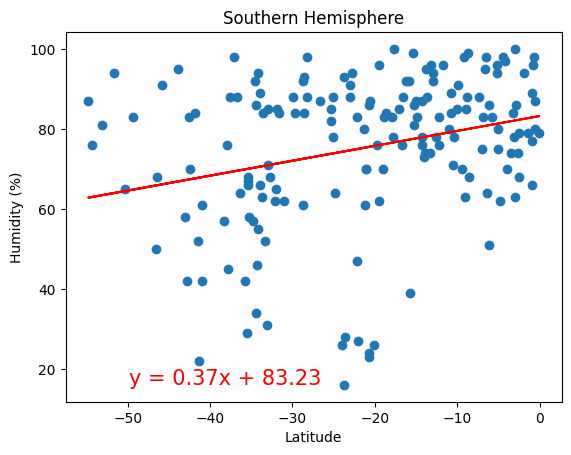

In [21]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere')
plt.show() 

**Discussion about the linear relationship:** YOUR RESPONSE HERE

While examining the relationship between humidity and a city's latitude, it becomes evident that this association is weaker compared to the analysis of temperature. Nevertheless, cities in close proximity to the equator tend to exhibit higher humidity percentages, whereas those located farther away experience drier climates.

The plotted linear regression analysis showcases a mild negative correlation in the northern hemisphere and a weak positive correlation in the southern hemisphere. However, the plot also indicates considerable variance within the data. Consequently, in the northern hemisphere, latitude alone may not serve as a reliable predictor of a city's humidity based solely on its distance from the equator.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.31


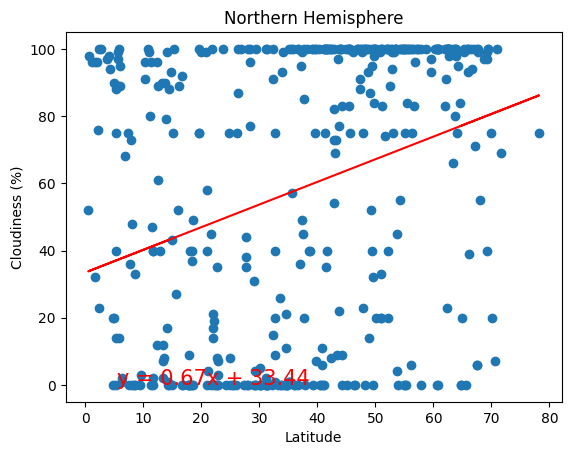

In [22]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere')
plt.show() 

The r-value is: 0.28


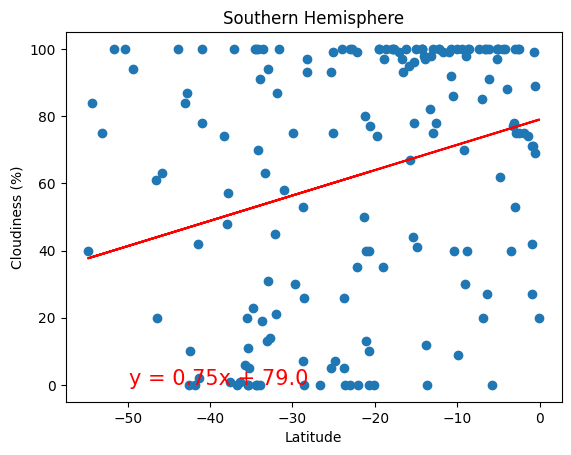

In [23]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere')
plt.show() 

**Discussion about the linear relationship:** YOUR RESPONSE HERE

A similar weak correlation between cloudiness and a city's latitude can be observed in both the northern and southern hemispheres. Interestingly, the relationship appears to display opposite trends. In the northern hemisphere, cities closer to the equator tend to have lower percentages of cloudiness, which increase as you move away from the equator. Conversely, in the southern hemisphere, cities farther from the equator tend to experience lower cloud cover, which increases as you approach the equator.

This opposing trend could potentially be attributed to the distinct seasonal periods of the northern and southern hemispheres. However, due to the notably weak relationship observed in both hemispheres, predicting the percentage of cloudiness solely based on latitude might be challenging.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.15


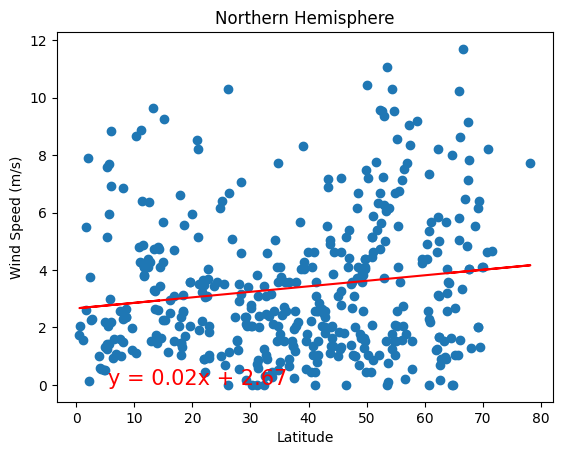

In [24]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('Northern Hemisphere')
plt.show()

The r-value is: -0.33


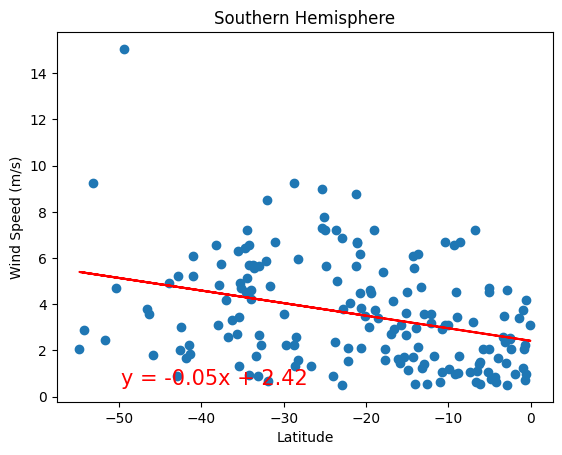

In [25]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('Southern Hemisphere')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In the northern hemisphere, the correlation between wind speed and a city's latitude appears notably weak, suggesting a lack of significant relationship between these two factors. Conversely, in the southern hemisphere, there seems to be a slightly higher but still weak correlation.

Across both hemispheres, a general trend emerges where cities closer to the equator tend to experience lower wind speeds, that increase as the distance from the equator grows. Despite this observed trend, the overall relationship between wind speed and a city's latitude remains inconclusive.


